In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming the CSV file has been correctly converted and saved as 'industries_skills.csv'
file_path =  r'C:\Users\alwah\Untitled Folder 5\hi.csv'
df = pd.read_csv(file_path)

# Combine all related skills columns into a single list for each row
df['skills'] = df[df.columns[1:]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

# Prepare the data for training
X = df['name']
y = df['skills'].str.get_dummies(sep=',')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the industry/field names
vectorizer = CountVectorizer()

# Transform the data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Create and train the model using RandomForestClassifier
model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

# Evaluate the model
# For classification tasks, we use classification_report to evaluate the performance
print(classification_report(y_test, y_pred, target_names=y.columns))

# Function to predict skills based on industry name
def predict_skills(industry_name):
    industry_vec = vectorizer.transform([industry_name])
    skills = model.predict(industry_vec)
    return y.columns[skills[0] == 1].tolist()

# Example usage
industry_name = "advance excel"
predicted_skills = predict_skills(industry_name)
print(predicted_skills)


Columns in the DataFrame: Index(['name', 'related_1', 'related_2', 'related_3', 'related_4', 'related_5',
       'related_6', 'related_7', 'related_8', 'related_9', 'related_10'],
      dtype='object')
                        name  \
0                a certified   
1  a certified it technician   
2   a certified professional   
3            a quick learner   
4                     abacus   

                                              skills  
0  network certified,laptops,n certified,computer...  
1  n certified,network certified,comptia network ...  
2  network certified,comptia network certified,n ...  
3  product validation,great communication skills,...  
4  legal solutions,galileo,timeslips,tabs3,amicus...  


c:\users\alwah\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alwah\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alwah\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

                                             precision    recall  f1-score   support

                                a certified       0.00      0.00      0.00         0
                  a certified it technician       0.00      0.00      0.00         1
                   a certified professional       0.00      0.00      0.00         0
                                        aac       0.00      0.00      0.00         0
                                      aacr2       0.00      0.00      0.00         0
                              aandb testing       0.00      0.00      0.00         0
                                      aandp       0.00      0.00      0.00         1
                                        aas       0.00      0.00      0.00         1
                                        aat       0.00      0.00      0.00         0
                                       abap       0.00      0.00      0.00         0
                                     abaqus       0.00      0.00

Average Accuracy: 0.9965293923215389
Predicted Skills: ['advanced sql', 'excel dashboards', 'macro', 'macros', 'ms access', 'pf', 'primavera p3', 'tally erp', 'vba', 'vlookup']


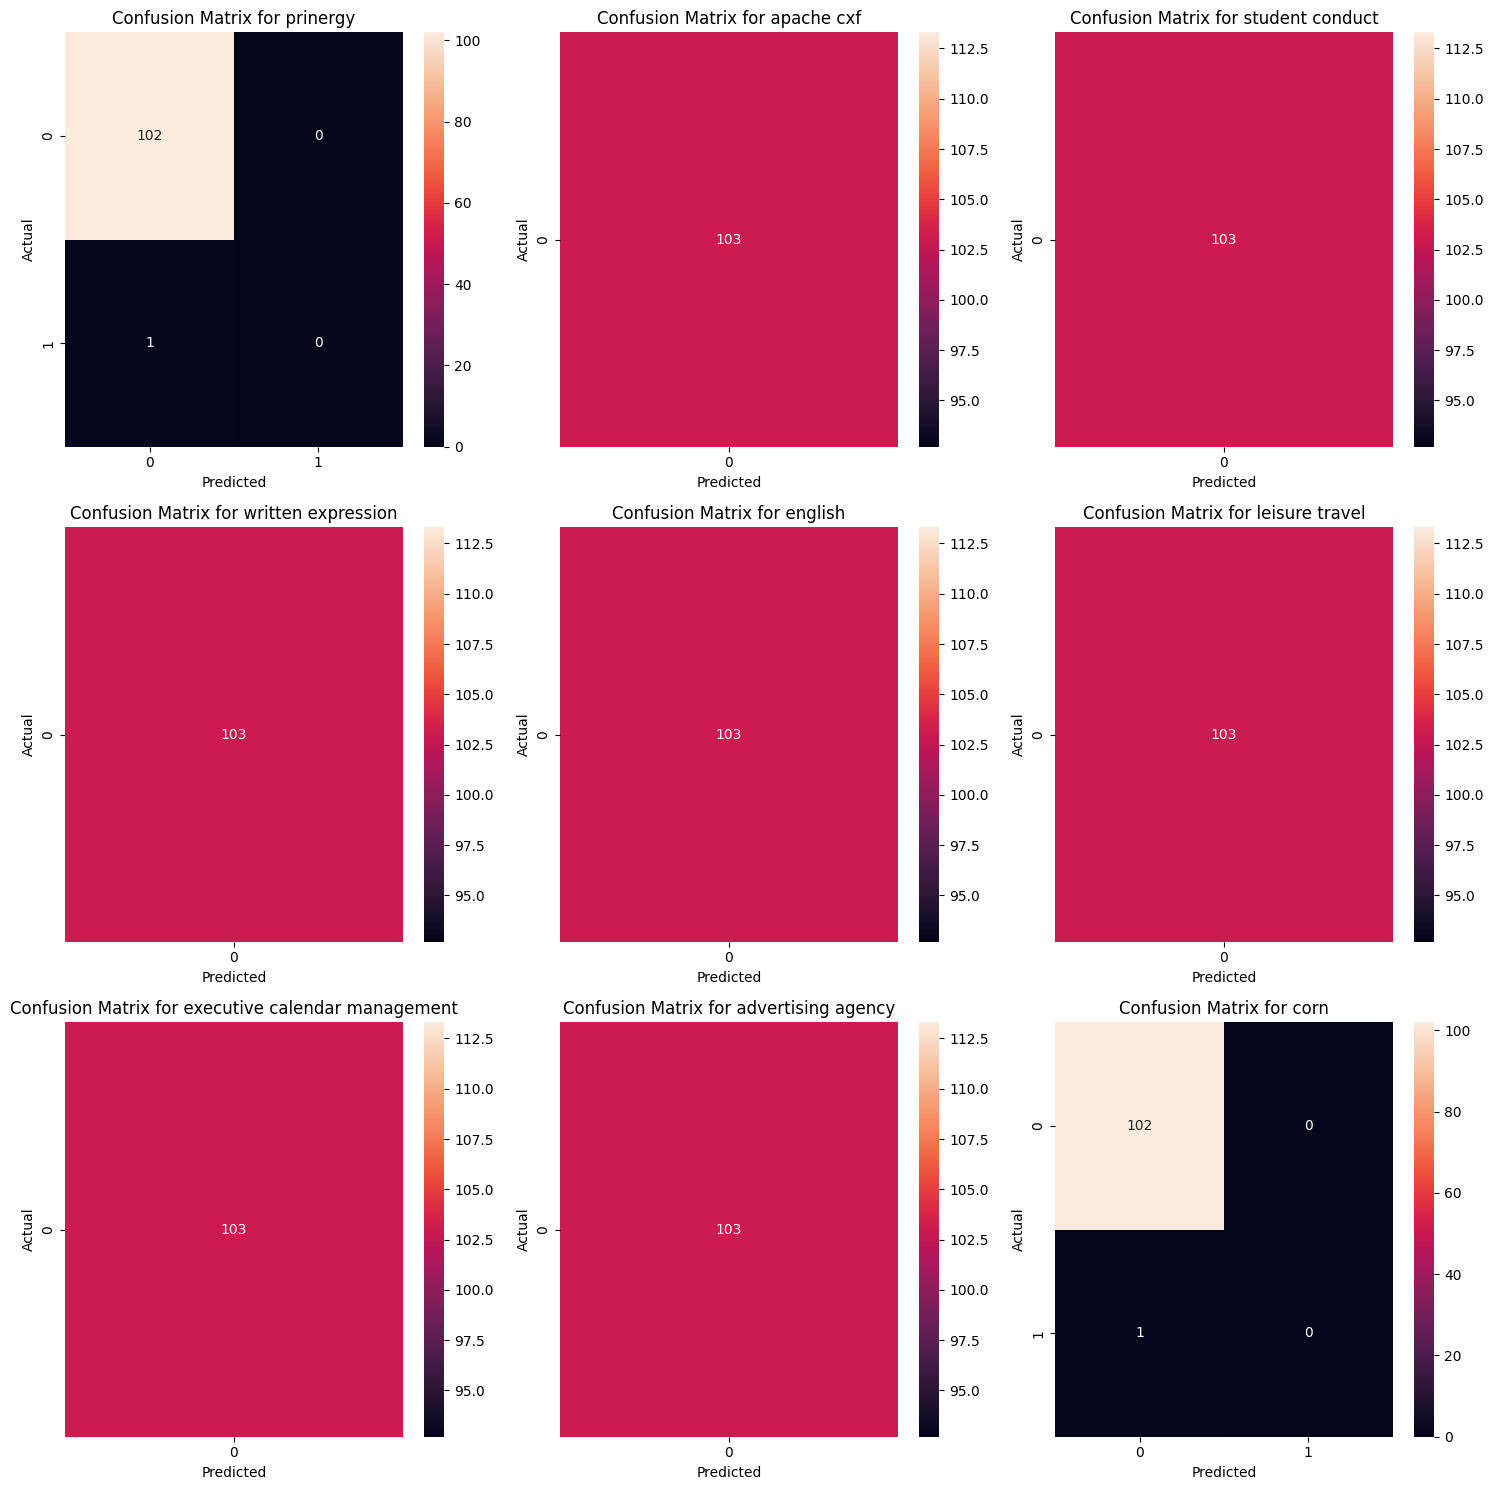

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the CSV file
file_path = r'C:\Users\alwah\Untitled Folder 4\hi.csv'
df = pd.read_csv(file_path)

# Check the columns to ensure 'skills' is properly created
print("Columns in the DataFrame:", df.columns)

# Combine all related skills columns into a single list for each row
df['skills'] = df[df.columns[1:]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

# Verify the 'skills' column was created correctly
print(df[['name', 'skills']].head())

# Prepare the data for training
X = df['name']
y = df['skills'].str.get_dummies(sep=',')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the industry/field names
vectorizer = CountVectorizer()

# Transform the data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Create and train the model using RandomForestClassifier
model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

# Evaluate the model
print(classification_report(y_test, y_pred, target_names=y.columns))

# Calculate the accuracy for each label
accuracies = []
for i in range(y_test.shape[1]):
    accuracy = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    accuracies.append(accuracy)

# Calculate the average accuracy across all labels
average_accuracy = sum(accuracies) / len(accuracies)
print("Average Accuracy:", average_accuracy)

# Function to predict skills based on industry name
def predict_skills(industry_name):
    industry_vec = vectorizer.transform([industry_name])
    skills = model.predict(industry_vec)
    return y.columns[skills[0] == 1].tolist()

# Example usage
industry_name = "advance excel"
predicted_skills = predict_skills(industry_name)
print("Predicted Skills:", predicted_skills)

# Select a random subset of labels for visualization
np.random.seed(42)  # For reproducibility
selected_labels = np.random.choice(y.columns, size=9, replace=False)

# Create confusion matrix for each selected label and visualize
num_labels = len(selected_labels)
fig, axes = plt.subplots(num_labels // 3 + (num_labels % 3 != 0), 3, figsize=(15, 5 * (num_labels // 3 + (num_labels % 3 != 0))))

for i, label in enumerate(selected_labels):
    cm = confusion_matrix(y_test[label], y_pred[:, y.columns.get_loc(label)])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes.flat[i])
    axes.flat[i].set_title(f'Confusion Matrix for {label}')
    axes.flat[i].set_xlabel('Predicted')
    axes.flat[i].set_ylabel('Actual')

# Adjust layout
plt.tight_layout()
plt.show()


In [2]:
industry_name = "abacus"
predicted_skills = predict_skills(industry_name)
print("Predicted Skills:", predicted_skills)

Predicted Skills: ['airline ticketing', 'amadeus gds', 'amicus', 'fares', 'galileo', 'legal solutions', 'tabs3', 'time matters', 'timeslips', 'worldspan']


Columns in the DataFrame: Index(['name', 'related_1', 'related_2', 'related_3', 'related_4', 'related_5',
       'related_6', 'related_7', 'related_8', 'related_9', 'related_10'],
      dtype='object')
                        name  \
0                a certified   
1  a certified it technician   
2   a certified professional   
3            a quick learner   
4                     abacus   

                                              skills  
0  network certified,laptops,n certified,computer...  
1  n certified,network certified,comptia network ...  
2  network certified,comptia network certified,n ...  
3  product validation,great communication skills,...  
4  legal solutions,galileo,timeslips,tabs3,amicus...  


c:\Users\alwah\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alwah\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alwah\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

                                             precision    recall  f1-score   support

                                a certified       0.00      0.00      0.00         0
                  a certified it technician       0.00      0.00      0.00         1
                   a certified professional       0.00      0.00      0.00         0
                                        aac       0.00      0.00      0.00         0
                                      aacr2       0.00      0.00      0.00         0
                              aandb testing       0.00      0.00      0.00         0
                                      aandp       0.00      0.00      0.00         1
                                        aas       0.00      0.00      0.00         1
                                        aat       0.00      0.00      0.00         0
                                       abap       0.00      0.00      0.00         0
                                     abaqus       0.00      0.00

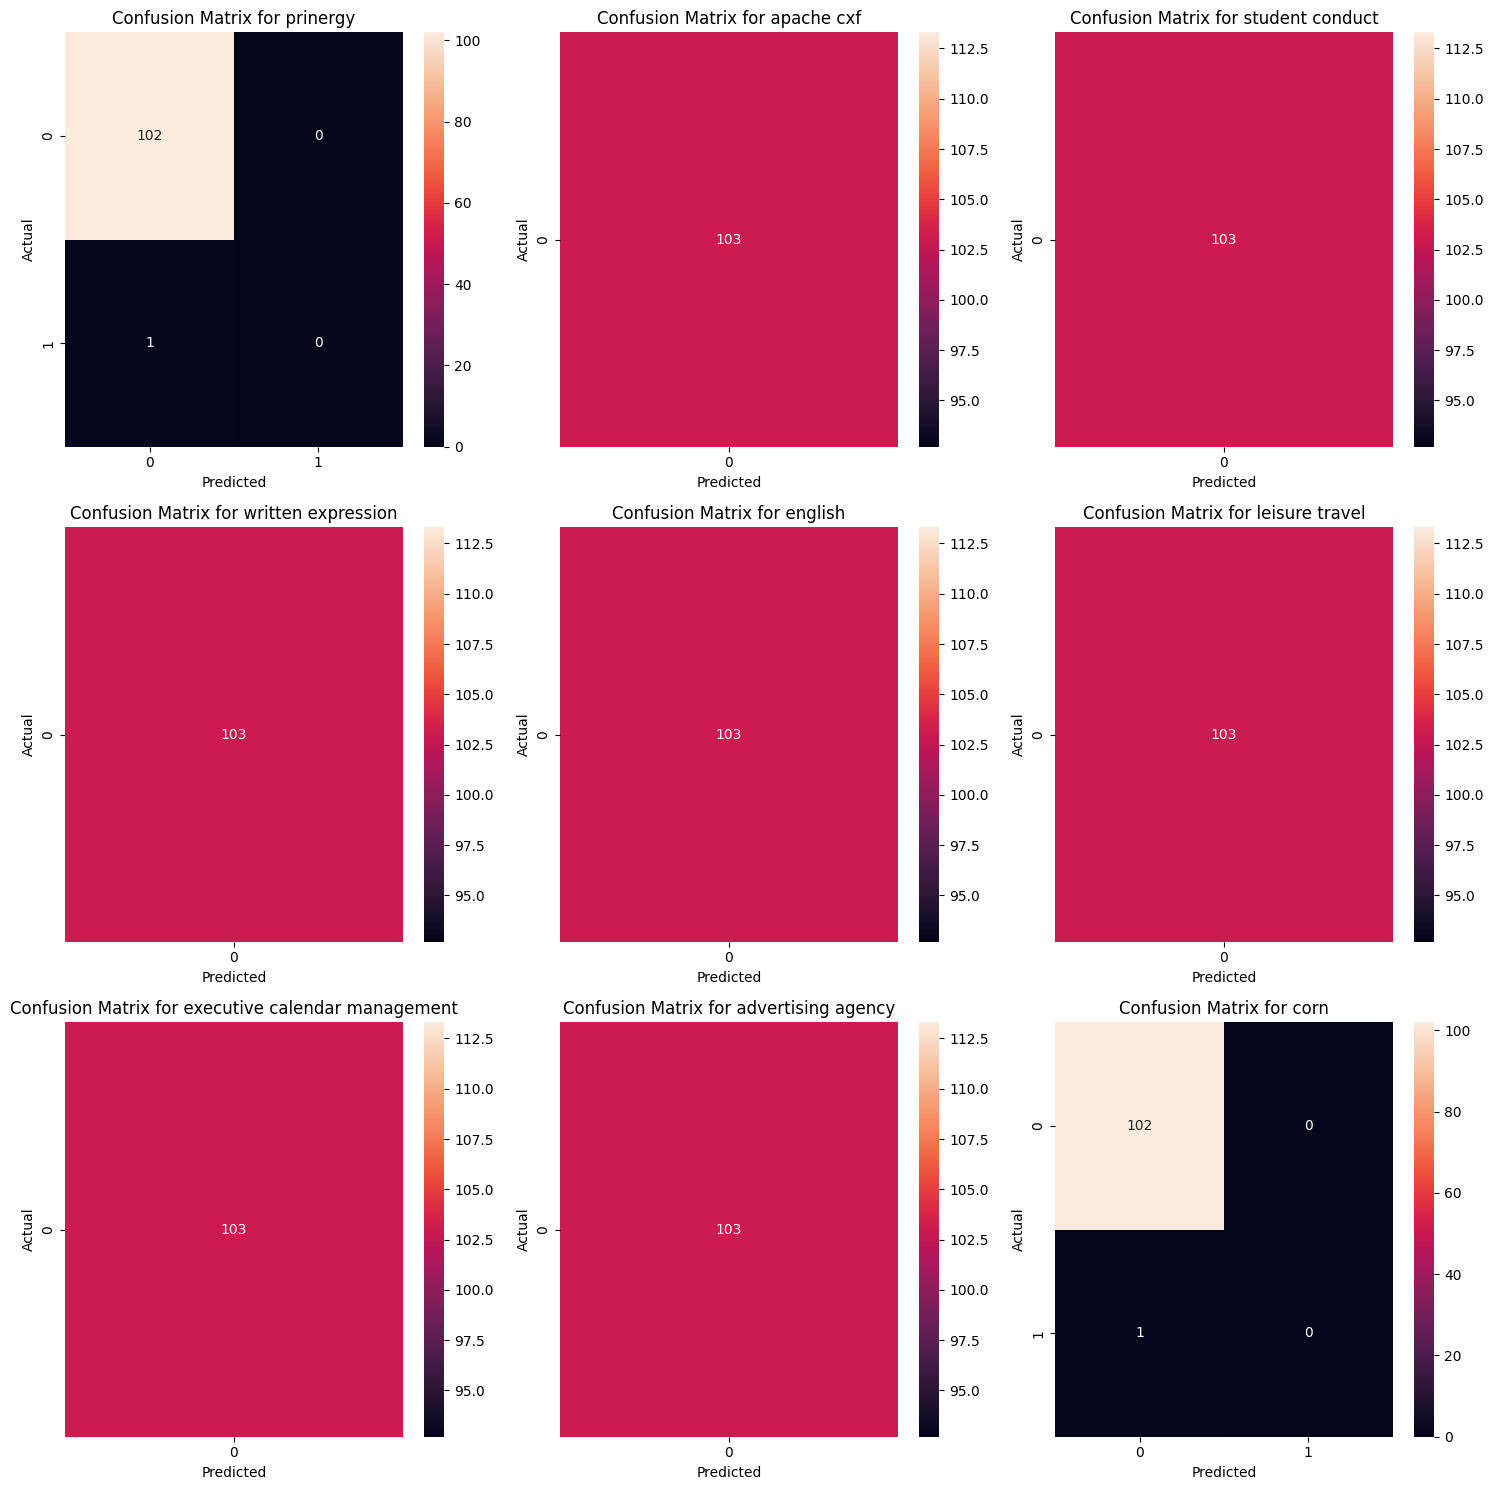

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the CSV file
file_path = r'C:\Users\alwah\Untitled Folder 4\hi.csv'
df = pd.read_csv(file_path)

# Check the columns to ensure 'skills' is properly created
print("Columns in the DataFrame:", df.columns)

# Combine all related skills columns into a single list for each row
df['skills'] = df[df.columns[1:]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

# Verify the 'skills' column was created correctly
print(df[['name', 'skills']].head())

# Prepare the data for training
X = df['name']
y = df['skills'].str.get_dummies(sep=',')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the industry/field names
vectorizer = CountVectorizer()

# Transform the data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Create and train the model using RandomForestClassifier
model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

# Evaluate the model
print(classification_report(y_test, y_pred, target_names=y.columns))

# Calculate the accuracy for each label
accuracies = []
for i in range(y_test.shape[1]):
    accuracy = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    accuracies.append(accuracy)

# Calculate the average accuracy across all labels
average_accuracy = sum(accuracies) / len(accuracies)
print("Average Accuracy:", average_accuracy)

# Function to predict skills based on industry name
def predict_skills(industry_name):
    industry_vec = vectorizer.transform([industry_name])
    skills = model.predict(industry_vec)
    return y.columns[skills[0] == 1].tolist()

# Example usage
industry_name = "advance excel"
predicted_skills = predict_skills(industry_name)
print("Predicted Skills:", predicted_skills)

# Select a random subset of labels for visualization
np.random.seed(42)  # For reproducibility
selected_labels = np.random.choice(y.columns, size=9, replace=False)

# Create confusion matrix for each selected label and visualize
num_labels = len(selected_labels)
fig, axes = plt.subplots(num_labels // 3 + (num_labels % 3 != 0), 3, figsize=(15, 5 * (num_labels // 3 + (num_labels % 3 != 0))))

for i, label in enumerate(selected_labels):
    cm = confusion_matrix(y_test[label], y_pred[:, y.columns.get_loc(label)])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes.flat[i])
    axes.flat[i].set_title(f'Confusion Matrix for {label}')
    axes.flat[i].set_xlabel('Predicted')
    axes.flat[i].set_ylabel('Actual')

# Adjust layout
plt.tight_layout()
plt.show()


In [4]:
industry_name = "abacus"
predicted_skills = predict_skills(industry_name)
print("Predicted Skills:", predicted_skills)

Predicted Skills: ['airline ticketing', 'amadeus gds', 'amicus', 'fares', 'galileo', 'legal solutions', 'tabs3', 'time matters', 'timeslips', 'worldspan']
